In [132]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

### №1

In [133]:
a, b = 10, 10

N = 100
k = 61

prior = stats.beta(a, b)
likelihood = lambda thetas: 0.3*norm(-4, np.sqrt(2)).pdf(thetas) + 0.7*norm(3, np.sqrt(6)).pdf(thetas)
thetas = np.linspace(0, 1, 200)


In [134]:
def proposal(current, sigma, **kwargs):
    _ = kwargs
    current = np.asarray(current)
    sigma = np.asarray(sigma)
    return current + sigma * np.random.randn(*current.shape)

In [135]:
def value(theta, **kwargs):
    _ = kwargs
    if theta < -12 or theta > 12:
        return 0
    else:
        return likelihood(theta)

In [136]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

In [137]:
post = metroplis(0, value, proposal, 3000, sigma=3)


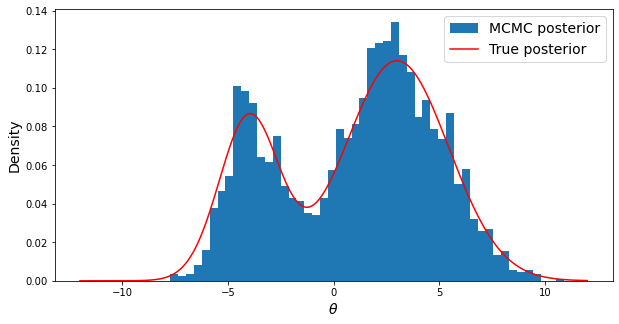

In [138]:
x = np.linspace(-12, 12, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)


fig = plt.figure(figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
plt.hist(post, bins=50, density=True, label='MCMC posterior')
plt.plot(x, y, label='True posterior', c='red')
plt.legend(fontsize=14)
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

### №2
Хотим примерно оценить матожидание, поэтому ограничим N = 10^6. Далее, будем считать количество единиц в полученном графе. В основном алгоритме сложным случаем является углы в таблице. Делаем на рамку длины один вокруг основной матрицы и заполним ее нулям, тем самым можно упростить проверки на смену цвета вершины

In [139]:
def checkToChangeColor(table, i, j):
    flag = -1

    if table[i, j] == 1:
        flag = 0 if np.random.randint(2) else -1
    else:
        if np.sum([table[i + 1, j], table[i, j + 1], table[i - 1, j], table[i, j - 1]]) == 0:
            flag = 1 if np.random.randint(2) else -1

    return flag


In [140]:
table = np.zeros((12,12), dtype=int)
N = 10**5
step = 0
amountConfigTable = np.zeros(N, dtype=int)

while step < N:
    i, j = np.random.randint(1, 11, size = 2)
    
    # не менять цвет
    if checkToChangeColor(table, i, j) == -1:
        continue

    # меняем цвет: 1 - черный, 0 - белый
    if checkToChangeColor(table, i, j):
        table[i, j] = 1
    else:
        table[i, j] = 0
        
    amountConfigTable[step] = np.sum(table)
    if(np.sum(table) == 41):
        print(table)
    step += 1



[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 1 0 1 0 0]
 [0 1 0 0 0 1 0 0 0 0 1 0]
 [0 0 1 0 1 0 0 1 0 1 0 0]
 [0 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 1 0 0 0]
 [0 0 0 1 0 1 0 1 0 1 0 0]
 [0 0 1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1 0 0]
 [0 0 1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1 0 0]
 [0 0 1 0 1 0 1 0 1 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 1 0]
 [0 0 1 0 1 0 1 0 0 1 0 0]
 [0 1 0 1 0 1 0 0 1 0 1 0]
 [0 0 1 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 1 0 0 1 0 0 0]
 [0 0 1 0 1 0 1 0 0 1 0 0]
 [0 1 0 1 0 1 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1 0 0]
 [0 0 1 0 1 0 1 0 1 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 1 0]
 [0 0 1 0 1 0 1 0 0 1 0 0]
 [0 1 0 1 0 1 0 0 1 0 1 0]
 [0 0 1 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 1 0 0 1 0 0 0]
 [0 0 1 0 1 0 1 0 0 1 0 0]
 [0 1 0 1 0 1 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0

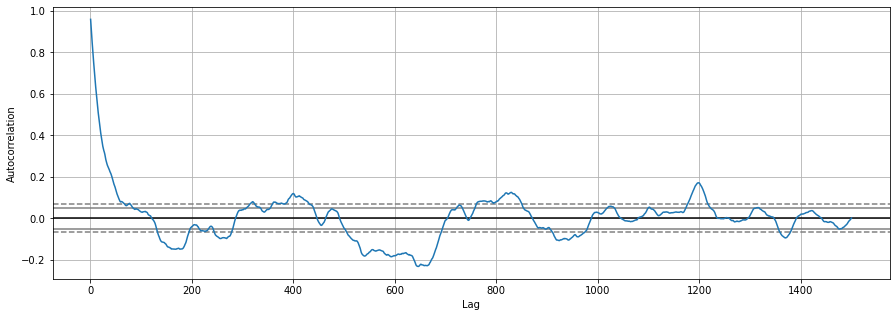

In [141]:
fig, ax = plt.subplots(1, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
pd.plotting.autocorrelation_plot(amountConfigTable[:1500], ax=ax)
plt.show()

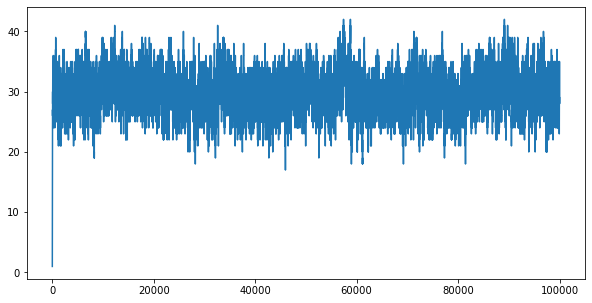

In [142]:
fig = plt.figure(figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
plt.plot(amountConfigTable)
plt.show()

In [143]:
np.unique(amountConfigTable, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42]),
 array([    1,     1,     1,     1,     1,     1,     1,     2,     1,
            1,     2,     1,     1,     1,     2,     2,     4,    14,
           43,    83,   188,   441,   960,  1940,  3568,  5774,  8413,
        10825, 12286, 13130, 12022,  9891,  7851,  5464,  3428,  1945,
          889,   462,   214,    94,    46,     5]))

In [144]:
def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):])

In [145]:
g_test(amountConfigTable[100:])

Ttest_indResult(statistic=-2.182470104001802, pvalue=0.029078723329660966)

In [146]:
np.mean(amountConfigTable[200::400])

29.928